In [7]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing


In [8]:
data = fetch_california_housing(as_frame= True)
data_set = data.frame
print(data_set)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  MedHouseVal
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23        4.526
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22        3.585
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24        3.521
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25        3.413
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25        3.422
...       ...       ...       ...        ...         ...       ...       ...        ...          ...
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48    -121.09        0.781
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49    -121.21        0.771
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43    -121.22    

In [9]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
frequency = data_set["Latitude"].value_counts()
print(frequency)


Latitude
34.06    244
34.05    236
34.08    234
34.07    231
34.04    221
        ... 
35.69      1
35.86      1
35.85      1
35.89      1
35.88      1
Name: count, Length: 862, dtype: int64


In [11]:
data_set.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


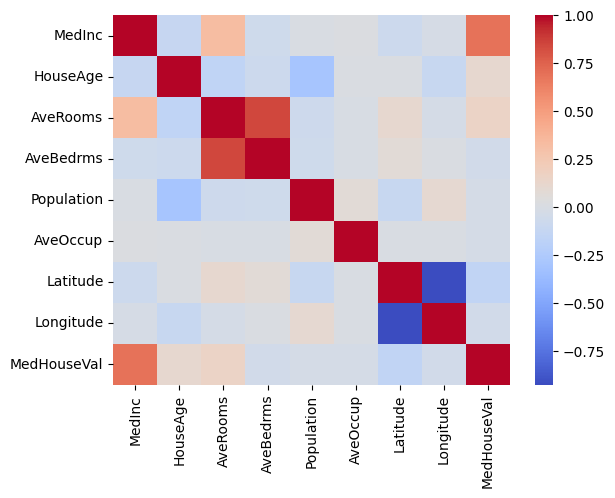

In [12]:
import seaborn as sns
numeric_data = data_set.select_dtypes(include=["number"])
sns.heatmap(numeric_data.corr() , cmap = 'coolwarm')
plt.show()

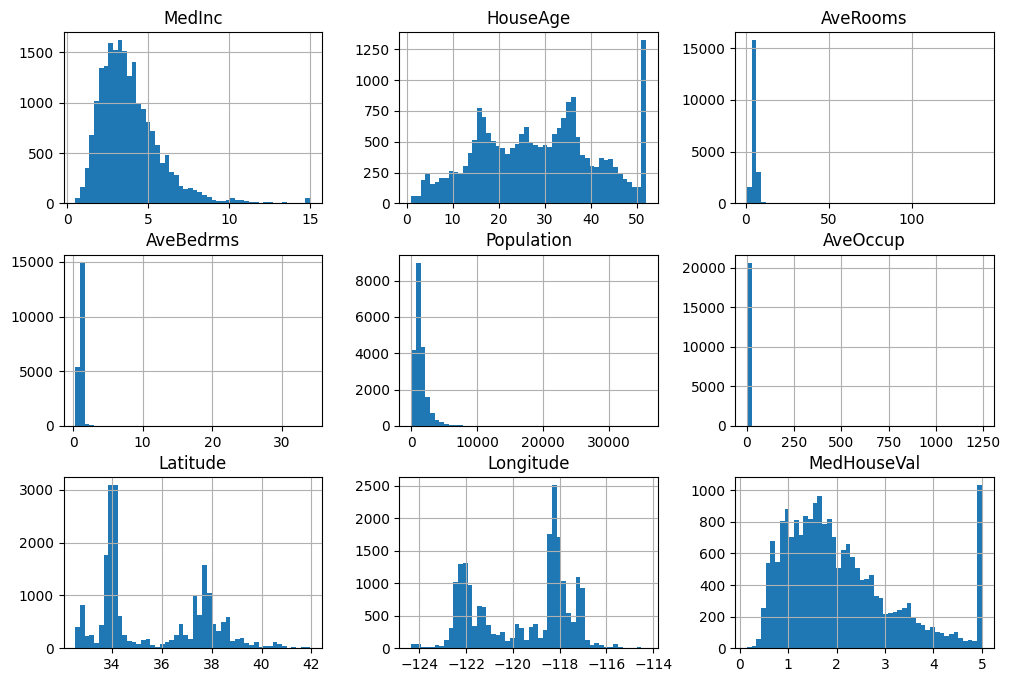

In [13]:
data_set.hist(bins = 50 , figsize = (12 , 8))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(data_set , test_size = 0.2 , random_state=42) 

In [ ]:
data_set["Income_cat"] = pd.cut(data_set["MedInc"],
                                bins = [0. , 1.5 , 3.0 , 4.5 , 6., np.inf],
                                labels = [1 , 2  , 3 , 4 ,5])
#this divided the income data into a data which has a lesser bias

Income_cat
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64


<Axes: xlabel='Income_cat', ylabel='No of districts'>

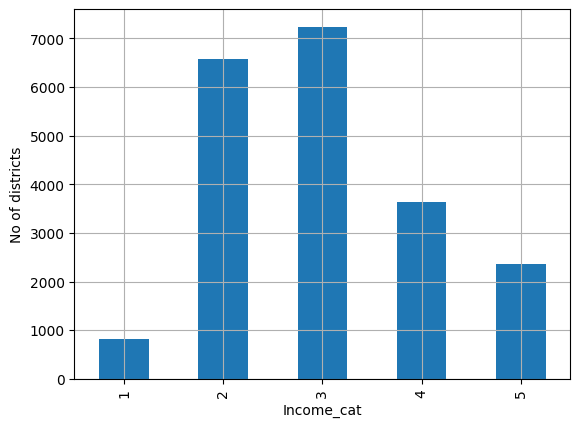

In [24]:
frequency = data_set["Income_cat"].value_counts().sort_index()
print(frequency)
plt.ylabel("No of districts")
frequency.plot(kind = "bar" , grid = True )


In [26]:
strat_train_set , start_test_set = train_test_split(data_set , test_size=0.2 , stratify=data_set["Income_cat"] , random_state=42)

In [31]:
strat_train_set["Income_cat"].value_counts() / len(strat_train_set)

Income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

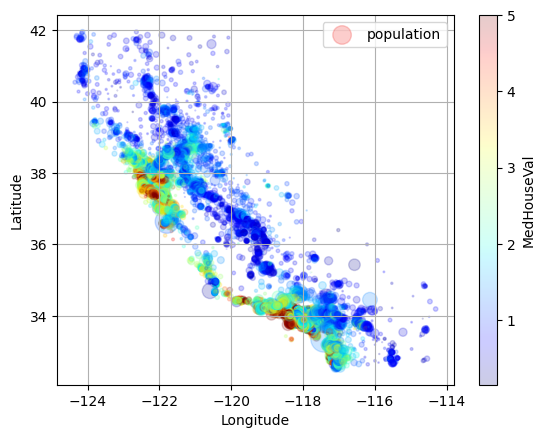

In [45]:
data_set.plot(kind = "scatter" , x = "Longitude" , y = "Latitude" , alpha = 0.2 , grid = True,
              s = data_set["Population"] / 100 , label = "population",
              c = "MedHouseVal" , cmap = "jet" , colorbar = True)
plt.show()
#this gives us an idea about the density of the houses in a set loacation